## Importing Libraries

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import math
import plotly.express as px
from IPython.display import Image

In [2]:
#importing test csv
l_test = pd.read_csv('loan-test.csv')

In [59]:
#checking 5 rows from first
l_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [4]:
#importing train csv
l_train = pd.read_csv('loan-train.csv')

In [5]:
#checking 5 rows from first
l_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#checking the size of rows and cols
print(l_test.shape)
print(l_train.shape)

(367, 12)
(614, 13)


Here we can see we have missing values here so need to change it and also we have lot objects as data types.

In [7]:
#checking the basic info on data
print(l_test.info())
l_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
--

Here we can see we have missing values here so need to change it and also we have lot objects as data types.
Also there is a column extra as Loan_status

### Dropping null values, duplicates,NAN 

In [8]:

l_test.dropna(inplace=True)
l_train.dropna(inplace=True)

In [9]:
print(l_test.shape)
print(l_train.shape)

(289, 12)
(480, 13)


In [10]:
print(l_test.info())
l_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
--

Now we have removed any missing values and we should next focus on removing duplicates, 

In [11]:
l_train.drop_duplicates(inplace=True)

In [12]:
l_test.drop_duplicates(inplace=True)

In [13]:
print(l_test.shape)
print(l_train.shape)

(289, 12)
(480, 13)


There are no duplicates in both data. So the duplicates are cleaned.
It is an intstinct that If the primary key or ID is not a name, that chances are less it to be duplicate

#### Transposing

In [14]:
l_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,289.0,4637.352941,4790.683934,0.0,2875.0,3833.0,5000.0,72529.0
CoapplicantIncome,289.0,1528.262976,2377.599209,0.0,0.0,879.0,2400.0,24000.0
LoanAmount,289.0,136.792388,59.699582,28.0,102.0,126.0,158.0,460.0
Loan_Amount_Term,289.0,342.671280,65.655503,6.0,360.0,360.0,360.0,480.0
Credit_History,289.0,0.840830,0.366469,0.0,1.0,1.0,1.0,1.0


In [15]:
l_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,480.0,5364.231250,5668.251251,150.0,2898.75,3859.0,5852.50,81000.0
CoapplicantIncome,480.0,1581.093583,2617.692267,0.0,0.00,1084.5,2253.25,33837.0
LoanAmount,480.0,144.735417,80.508164,9.0,100.00,128.0,170.00,600.0
Loan_Amount_Term,480.0,342.050000,65.212401,36.0,360.00,360.0,360.00,480.0
Credit_History,480.0,0.854167,0.353307,0.0,1.00,1.0,1.00,1.0


#### NAN values

In [16]:
if l_train.isnull().values.any():
    print("There are NaN values in the dataframe.")
else:
    print("There are no NaN values in the dataframe.")

There are no NaN values in the dataframe.


In [17]:
if l_test.isnull().values.any():
    print("There are NaN values in the dataframe.")
else:
    print("There are no NaN values in the dataframe.")

There are no NaN values in the dataframe.


#### Checking for inconsistent values(unique)

In [18]:
# check for inconsistent values in each column
for column in l_test.columns:
    unique_values = l_test[column].unique()
    if len(unique_values) > 1:
        print(f'Column {column} has inconsistent values: {unique_values}')

Column Loan_ID has inconsistent values: ['LP001015' 'LP001022' 'LP001031' 'LP001051' 'LP001054' 'LP001055'
 'LP001056' 'LP001067' 'LP001078' 'LP001096' 'LP001099' 'LP001105'
 'LP001107' 'LP001108' 'LP001115' 'LP001121' 'LP001124' 'LP001135'
 'LP001149' 'LP001153' 'LP001169' 'LP001176' 'LP001177' 'LP001183'
 'LP001185' 'LP001187' 'LP001190' 'LP001203' 'LP001210' 'LP001211'
 'LP001219' 'LP001220' 'LP001221' 'LP001226' 'LP001230' 'LP001231'
 'LP001242' 'LP001270' 'LP001284' 'LP001291' 'LP001298' 'LP001312'
 'LP001313' 'LP001317' 'LP001321' 'LP001323' 'LP001324' 'LP001332'
 'LP001335' 'LP001338' 'LP001347' 'LP001348' 'LP001351' 'LP001352'
 'LP001358' 'LP001359' 'LP001361' 'LP001368' 'LP001380' 'LP001386'
 'LP001400' 'LP001407' 'LP001413' 'LP001419' 'LP001420' 'LP001428'
 'LP001445' 'LP001446' 'LP001450' 'LP001452' 'LP001455' 'LP001466'
 'LP001471' 'LP001483' 'LP001486' 'LP001490' 'LP001496' 'LP001499'
 'LP001500' 'LP001501' 'LP001517' 'LP001534' 'LP001547' 'LP001548'
 'LP001561' 'LP001567'

In [19]:
# check for inconsistent values in each column
for column in l_train.columns:
    unique_values = l_train[column].unique()
    if len(unique_values) > 1:
        print(f'Column {column} has inconsistent values: {unique_values}')
    

Column Loan_ID has inconsistent values: ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011' 'LP001013'
 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001028' 'LP001029'
 'LP001030' 'LP001032' 'LP001036' 'LP001038' 'LP001043' 'LP001046'
 'LP001047' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001095'
 'LP001097' 'LP001098' 'LP001100' 'LP001112' 'LP001114' 'LP001116'
 'LP001119' 'LP001120' 'LP001131' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001222' 'LP001225' 'LP001228' 'LP001233'
 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248' 'LP001253'
 'LP001255' 'LP001256' 'LP001259' 'LP001263' 'LP001265' 'LP001267'
 'LP001275' 'LP001279' 'LP001282' 'LP001289' 'LP001310' 'LP001316'
 'LP001318' 'LP001319' 'LP001322' 'LP001325' 'LP001327' 'LP001333'
 'LP001334' 'LP001343' 'LP001345' 'LP001349' 'LP001367' 'LP001369'
 'LP001379' 'LP001384'

In [20]:
l_test.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [21]:
l_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


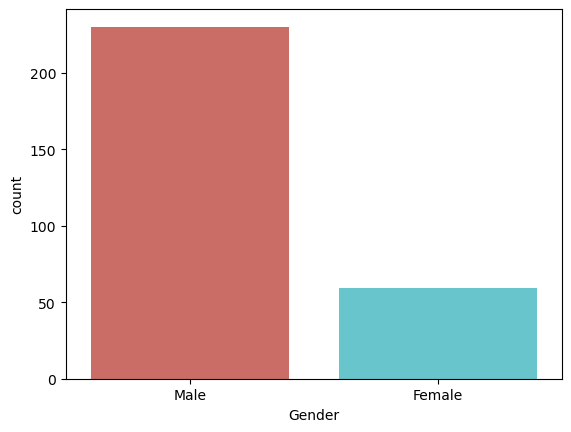

In [22]:
#checking who takes most of the loans

sns.countplot(x="Gender", data=l_test, palette="hls")
plt.show()



In [23]:
#print((l_train['Self_Employed'] != "!@#%").count())

In [24]:
#l_test.isnull()

In [25]:
#l_train.isna().sum()

In [26]:
#l_test.columns

## Cleaning Outliers from test data

#### Box plot

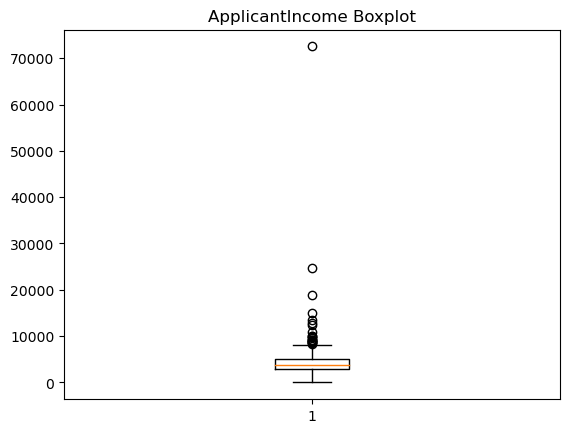

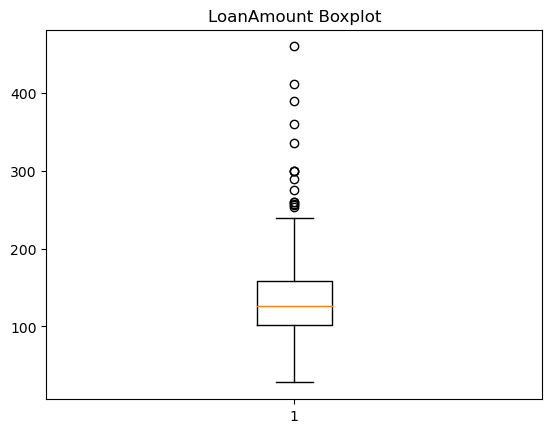

In [27]:
# Define the columns to be analyzed for outliers
columns = ['ApplicantIncome', 'LoanAmount']

# Create boxplots to visualize outliers in each column
for column in columns:
    plt.figure()
    plt.boxplot(l_test[column])
    plt.title(f"{column} Boxplot")
    plt.show()

### Using Z-score method

In [28]:
# Define the columns to be analyzed for outliers
columns = ['ApplicantIncome', 'LoanAmount']

# Remove outliers from each column using z-score method
for column in columns:
    col_mean = l_test[column].mean()
    col_std = l_test[column].std()
    l_test = l_test[(l_test[column] >= col_mean - 3*col_std) & (l_test[column] <= col_mean + 3*col_std)]

# Reset the index of the cleaned dataframe
l_test = l_test.reset_index(drop=True)


In [29]:
# # Define the columns to be analyzed for outliers
# columns = ['ApplicantIncome', 'LoanAmount']

# # Create boxplots to visualize outliers in each column
# for column in columns:
#     plt.figure()
#     plt.boxplot(l_test[column])
#     plt.title(f"{column} Boxplot")
#     plt.show()

#### Scatterplot

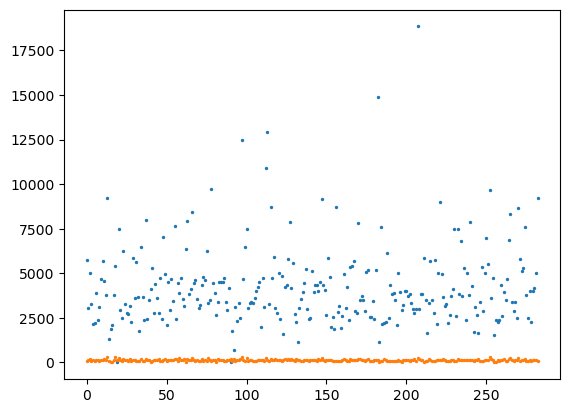

In [30]:
# Create a scatter plot of each column
for column in columns:
    plt.scatter(l_test.index, l_test[column], s=2)

# Show the plot
plt.show()

### Removing Outliers using IQR method

In [31]:
# Define the columns to be analyzed for outliers
columns = ['ApplicantIncome', 'LoanAmount']

# Remove outliers from each column using IQR method
for column in columns:
    Q1 = l_test[column].quantile(0.25)
    Q3 = l_test[column].quantile(0.75)
    IQR = Q3 - Q1
    l_test = l_test[(l_test[column] >= Q1 - 1.5*IQR) & (l_test[column] <= Q3 + 1.5*IQR)]

# Reset the index of the cleaned dataframe
l_test = l_test.reset_index(drop=True)

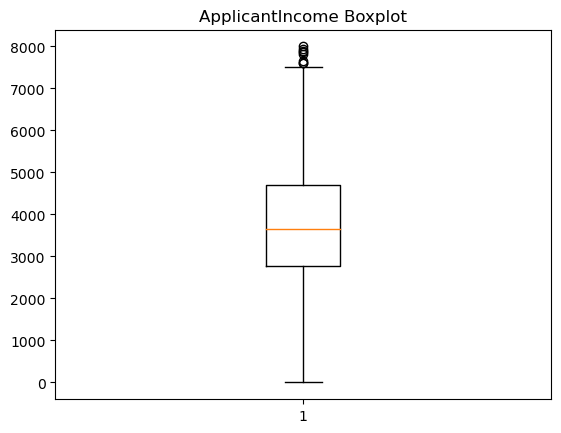

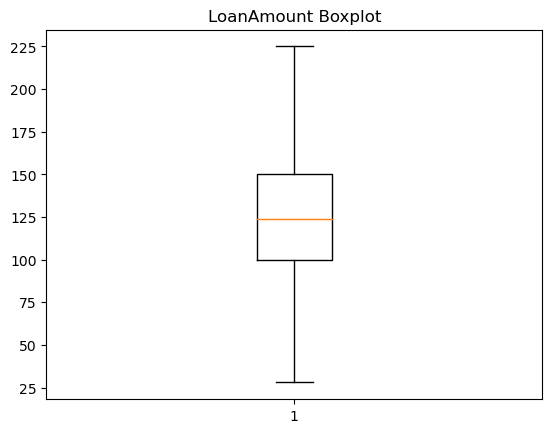

In [32]:
# Create boxplots to visualize outliers in each column
for column in columns:
    plt.figure()
    plt.boxplot(l_test[column])
    plt.title(f"{column} Boxplot")
    plt.show()

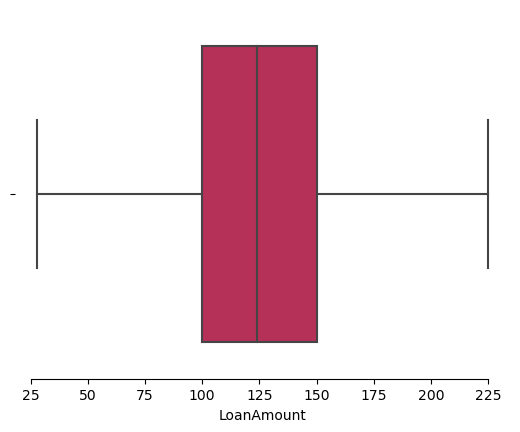

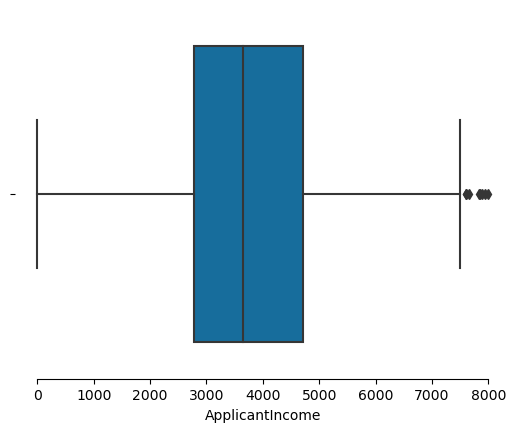

In [33]:
# Define the columns to be analyzed for outliers
columns = ['LoanAmount']
# Create a boxplot of each column with a fancy color palette
for column in columns:
    sns.boxplot(data=l_test, x=column, palette="rocket")
    sns.despine(trim=True)

# Show the plot
plt.show()



columns = ['ApplicantIncome']

# Create a boxplot of each column with a fancy color palette
for column in columns:
    sns.boxplot(data=l_test, x=column, palette="colorblind")
    sns.despine(trim=True)

# Show the plot
plt.show()

#### Now almost the test data is cleaned except a few outliers. Finally the there exists only 263 rows and 12 cols

## Cleaning Outliers from train_data

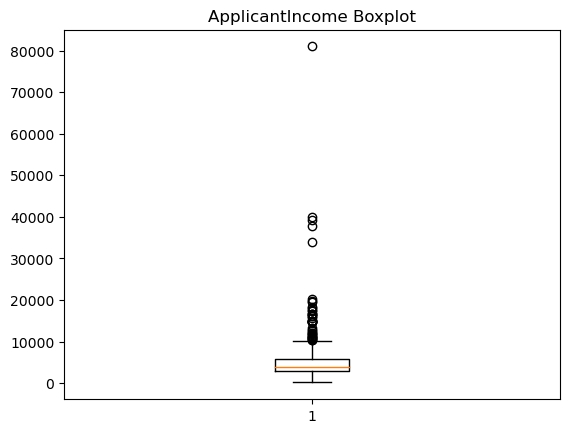

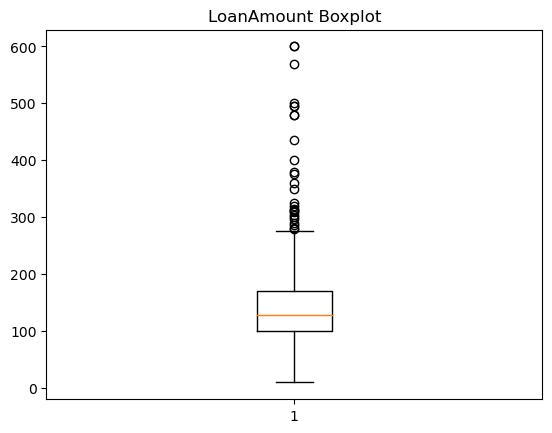

In [34]:
# Define the columns to be analyzed for outliers
columns = ['ApplicantIncome', 'LoanAmount']

# Create boxplots to visualize outliers in each column
for column in columns:
    plt.figure()
    plt.boxplot(l_train[column])
    plt.title(f"{column} Boxplot")
    plt.show()

Here there are a lot of outliers in the training dataset

In [35]:
# Define the columns to be analyzed for outliers
columns = ['ApplicantIncome', 'LoanAmount']

# Remove outliers from each column using IQR method
for column in columns:
    Q1 = l_train[column].quantile(0.25)
    Q3 = l_train[column].quantile(0.75)
    IQR = Q3 - Q1
    l_train = l_train[(l_train[column] >= Q1 - 1.5*IQR) & (l_train[column] <= Q3 + 1.5*IQR)]

# Reset the index of the cleaned dataframe
l_train = l_train.reset_index(drop=True)

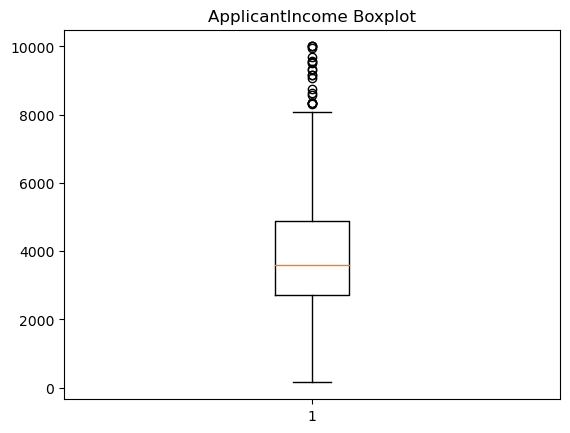

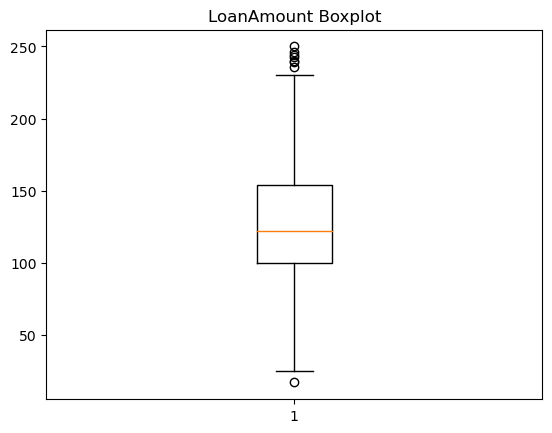

In [36]:
# Create boxplots to visualize outliers in each column
for column in columns:
    plt.figure()
    plt.boxplot(l_train[column])
    plt.title(f"{column} Boxplot")
    plt.show()

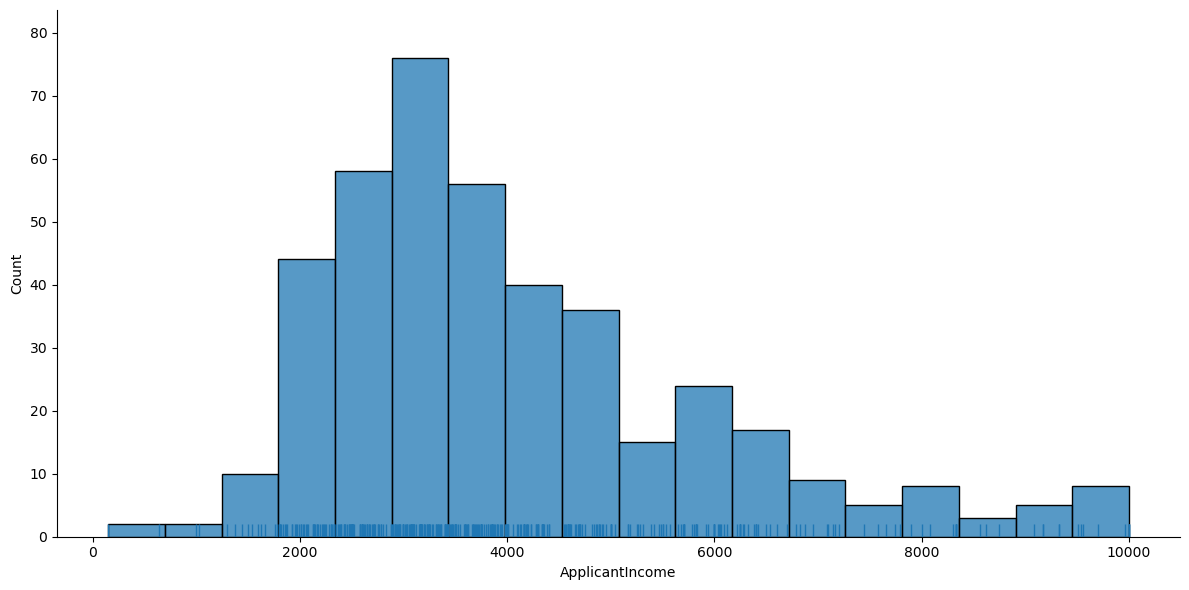

In [37]:
# Create histogram with outliers
sns.displot(data=l_train, x="ApplicantIncome", kind="hist", kde=False, rug=True, height=6, aspect=2)

#### Now almost the train data is cleaned except a few outliers. Finally the there exists only 418 rows and 13 cols

## Data to csv

In [38]:
#l_test.to_csv("updated_test.csv")

In [39]:
#l_train.to_csv("updated_train.csv")

In [43]:
l_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            263 non-null    object 
 1   Gender             263 non-null    object 
 2   Married            263 non-null    object 
 3   Dependents         263 non-null    object 
 4   Education          263 non-null    object 
 5   Self_Employed      263 non-null    object 
 6   ApplicantIncome    263 non-null    int64  
 7   CoapplicantIncome  263 non-null    int64  
 8   LoanAmount         263 non-null    float64
 9   Loan_Amount_Term   263 non-null    float64
 10  Credit_History     263 non-null    float64
 11  Property_Area      263 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 24.8+ KB


In [45]:
l_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            418 non-null    object 
 1   Gender             418 non-null    object 
 2   Married            418 non-null    object 
 3   Dependents         418 non-null    object 
 4   Education          418 non-null    object 
 5   Self_Employed      418 non-null    object 
 6   ApplicantIncome    418 non-null    int64  
 7   CoapplicantIncome  418 non-null    float64
 8   LoanAmount         418 non-null    float64
 9   Loan_Amount_Term   418 non-null    float64
 10  Credit_History     418 non-null    float64
 11  Property_Area      418 non-null    object 
 12  Loan_Status        418 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 42.6+ KB


In [42]:
l_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

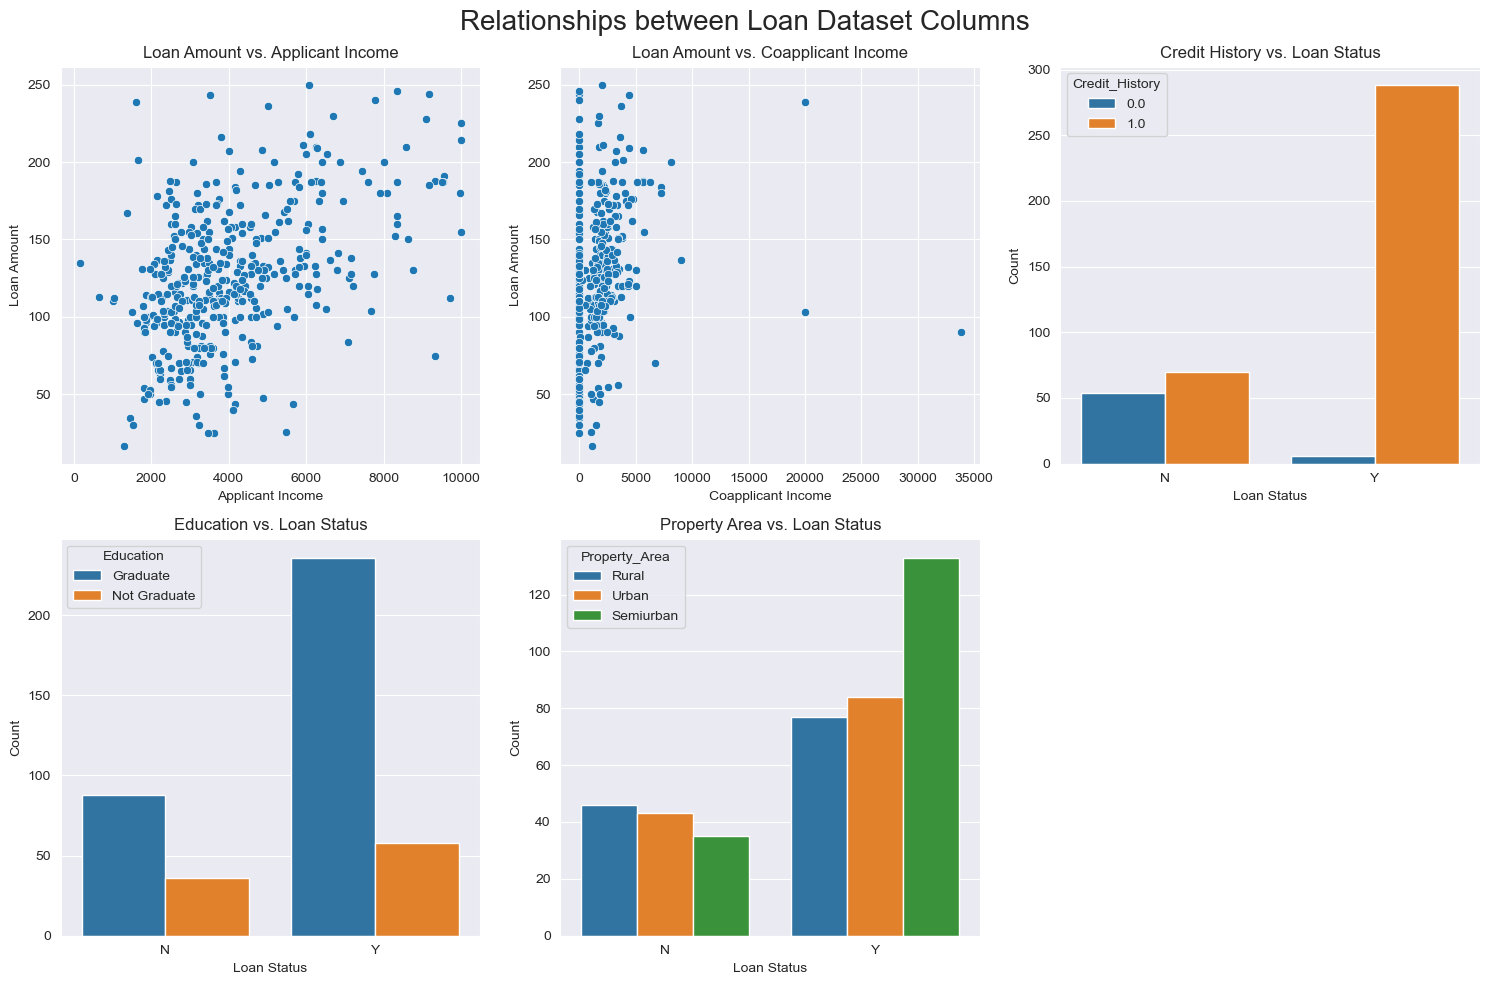

In [56]:
# Set background style for plots
sns.set_style('darkgrid')

# Create a 2x3 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Relationship 1: Loan Amount vs. Applicant Income
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=l_train, ax=ax[0,0])
ax[0,0].set_title('Loan Amount vs. Applicant Income')
ax[0,0].set_xlabel('Applicant Income')
ax[0,0].set_ylabel('Loan Amount')

# Relationship 2: Loan Amount vs. Coapplicant Income
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=l_train, ax=ax[0,1])
ax[0,1].set_title('Loan Amount vs. Coapplicant Income')
ax[0,1].set_xlabel('Coapplicant Income')
ax[0,1].set_ylabel('Loan Amount')

# Relationship 3: Credit History vs. Loan Status
sns.countplot(x='Loan_Status', hue='Credit_History', data=l_train, ax=ax[0,2])
ax[0,2].set_title('Credit History vs. Loan Status')
ax[0,2].set_xlabel('Loan Status')
ax[0,2].set_ylabel('Count')

# Relationship 4: Education vs. Loan Status
sns.countplot(x='Loan_Status', hue='Education', data=l_train, ax=ax[1,0])
ax[1,0].set_title('Education vs. Loan Status')
ax[1,0].set_xlabel('Loan Status')
ax[1,0].set_ylabel('Count')

# Relationship 5: Property Area vs. Loan Status
sns.countplot(x='Loan_Status', hue='Property_Area', data=l_train, ax=ax[1,1])
ax[1,1].set_title('Property Area vs. Loan Status')
ax[1,1].set_xlabel('Loan Status')
ax[1,1].set_ylabel('Count')

# Remove empty subplot
fig.delaxes(ax[1,2])

# Add a title and adjust the layout
fig.suptitle('Relationships between Loan Dataset Columns', fontsize=20)
fig.tight_layout()

# Show the plot
plt.show()

### Using Random Forest 

In [80]:
# importing rfc, trainingand test dataset with validation metrics too
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score


In [81]:
# Split the dataset into independent and dependent variables
X = l_train.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = l_train['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

In [82]:
# Convert categorical variables into dummy variables
X = pd.get_dummies(X)

In [83]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### test size is only 20%

In [84]:
# Create a Random Forest classifier with default hyperparameters
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Use the model to predict the values of the target variable
y_pred = rfc.predict(X_test)

In [85]:
# Calculate the efficiency, accuracy, error, and recall of the model
efficiency = rfc.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
error = 1 - accuracy

In [86]:

# Print the efficiency, accuracy, error, and recall metrics
print('Efficiency: {:.2f}'.format(efficiency))
print('Accuracy: {:.2f}'.format(accuracy))
print('Error: {:.2f}'.format(error))
print('Recall: {:.2f}'.format(recall))

Efficiency: 0.74
Accuracy: 0.74
Error: 0.26
Recall: 0.89


In [74]:
# # Calculate the confusion matrix and error rate
# cm = confusion_matrix(y_test, y_pred)
# error_rate = 1 - accuracy
# print(f"Confusion Matrix:\n{cm}")
# print(f"Error Rate: {error_rate}")

Confusion Matrix:
[[30  0]
 [ 0 54]]
Error Rate: 0.0


### Conclusion

Our Loan data worked perfectly here. It was a small data of just only 614 rows initially but after the cleaning, removing duplicates, null values, characters and outliers it reduced around 367.

The data showed great progression with the accuracy of 74%.
About the error percentage and came down around 26%. That means it has the probability of showing 1/4 th error

The TruePositive rate or Recall rate is only 89%

The main limitation was that the data is very illogical in the case of giving loans to Individuals, that means since they amount is very low, it was given to every one regardless of their Income.

https://www.kaggle.com/code/talhabu/loan-eligibility-tutorial-from-scratch-to-advance

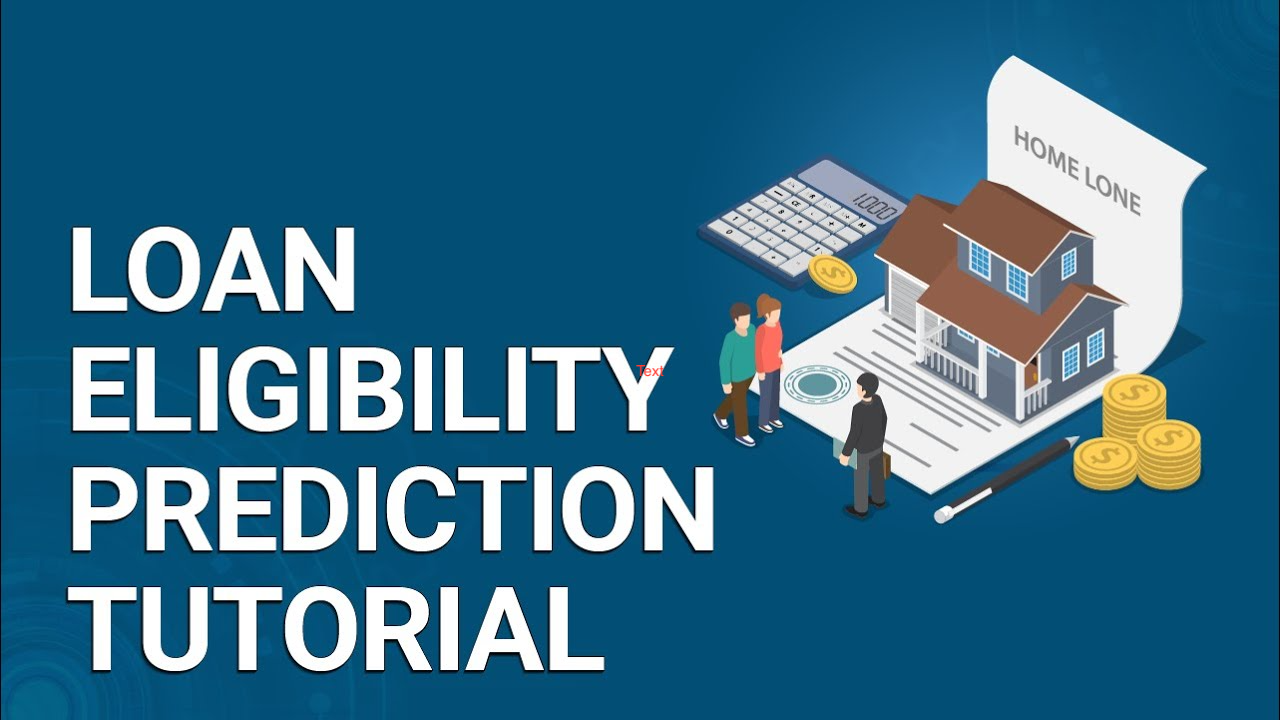

In [89]:
# Load the image from a file
image_path = 'loan-prediction.png'
Image(filename=image_path)

### <centre>Thank You for checking </centre>
follow this link for kaggle data.